# Non Linear Regression Analysis
EDX Machine Learning with Python: A Practical Introduction
Aaliyah Fiala
10/24/2020

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = np.arange(-0.5, 5.0, 0.1)

In [4]:
y = 2 * (x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

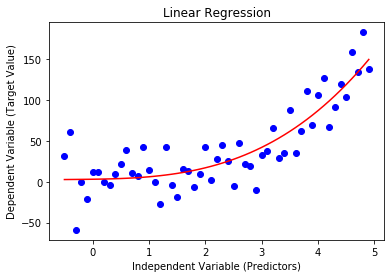

In [10]:
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable (Target Value)')
plt.xlabel('Independent Variable (Predictors)')
plt.title('Linear Regression')
plt.show()

Text(0.5, 1.0, 'Quadratic Regression')

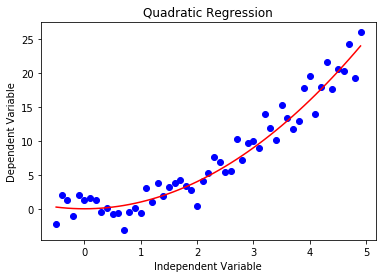

In [15]:
y = np.power(x, 2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.title('Quadratic Regression')

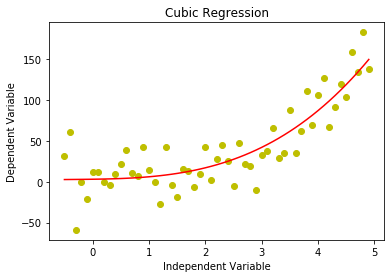

In [9]:
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'yo')
plt.plot(x, y, 'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.title('Cubic Regression')
plt.show()



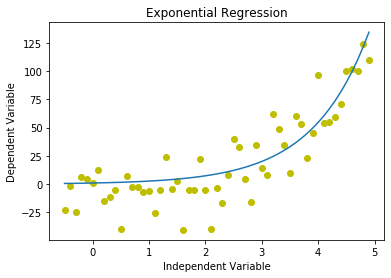

In [17]:
y = np.exp(x)
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'yo')
plt.plot(x,y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.title('Exponential Regression')
plt.show()


C:\Users\afiala\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


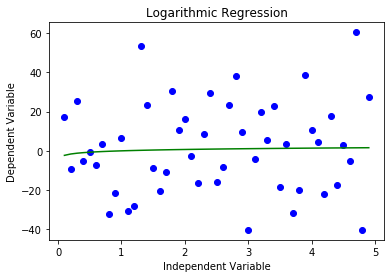

In [30]:
y = np.log(x)
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'green')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Logarithmic Regression')
plt.show()

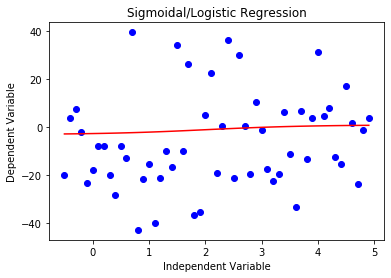

In [33]:
y = 1-4/(1+np.power(3, x-2))

y_noise = 20 * np.random.normal(size = x.size)
ydata = y + y_noise
plt.plot(x, ydata, 'bo')
plt.plot(x, y, 'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Sigmoidal/Logistic Regression')
plt.show()

## Non-Linear Regression Example

In [35]:
#!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


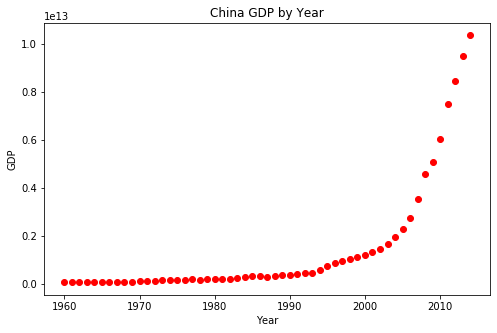

In [36]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.title('China GDP by Year')
plt.show()

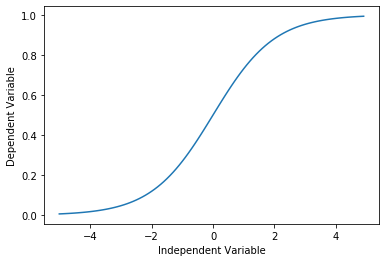

In [37]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x, y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [38]:
def sigmoid(x, Beta_1, Beta_2): 
    y = 1/ (1 + np.exp(-Beta_1 * (x-Beta_2)))
    return y

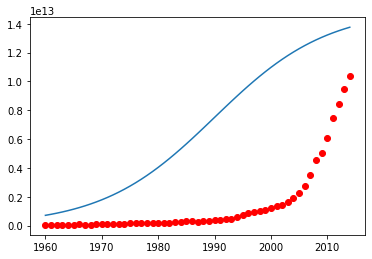

In [39]:
beta_1 = 0.10
beta_2 = 1990.0

y_pred = sigmoid(x_data, beta_1, beta_2)

plt.plot(x_data, y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [40]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [42]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print("beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

beta_1 = 690.451710, beta_2 = 0.997207


In [44]:
print(*popt)

690.4517099104501 0.9972071272535745


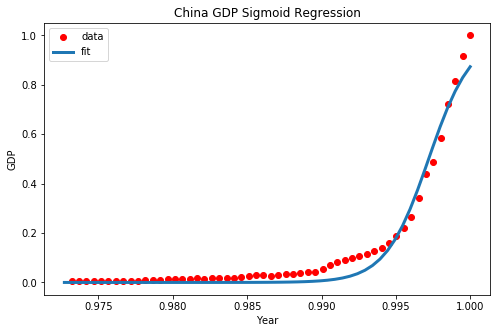

In [45]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize = (8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x, y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.title('China GDP Sigmoid Regression')
plt.show()


In [53]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

popt, pcov = curve_fit(sigmoid, train_x, train_y)

y_hat = sigmoid(test_x, *popt)


from sklearn.metrics import r2_score
print('MSA: %.2f' % np.mean(np.absolute(test_y - y_hat)))
print('MSE: %.2f' % np.mean((test_y - y_hat)**2))
print('R-Squared: %.2f' % r2_score(test_y, y_hat))

MSA: 0.19
MSE: 0.12
R-Squared: -0.44


C:\Users\afiala\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
